In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split


In [3]:
# Load the data splits
train_data = pd.read_csv('../mcats/data/train_data.csv')
val_data = pd.read_csv('../mcats/data/test_data.csv')
test_data = pd.read_csv('../mcats/data/val_data.csv')

# Split the data into X and y
X_train = train_data.iloc[:, 1:-1]
y_train = train_data.iloc[:, -1]
X_val = val_data.iloc[:, 1:-1]
y_val = val_data.iloc[:, -1]
X_test = test_data.iloc[:, 1:-1]
y_test = test_data.iloc[:, -1]

In [134]:
print(len(X_train),len(X_val), len(X_test))

3530 1165 1174


In [8]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
preds = knn.predict(X_train)
#y_ true is y_test  predict on x_text  y_pred is the output of the model
y_true = y_train
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.96      0.99      0.97       477
   classical       0.97      0.96      0.96       437
         pop       0.96      0.96      0.96       423
  electronic       0.98      0.96      0.97       424
       metal       0.98      0.98      0.98       443
        rock       0.98      0.96      0.97       450
     country       0.96      0.96      0.96       419
      reggae       0.97      1.00      0.98       457

    accuracy                           0.97      3530
   macro avg       0.97      0.97      0.97      3530
weighted avg       0.97      0.97      0.97      3530



In [5]:
knn.fit(X_train, y_train)
preds = knn.predict(X_test)
#y_ true is y_test  predict on x_text  y_pred is the output of the model
y_true = y_test
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.51      0.57      0.54       140
   classical       0.89      0.83      0.86       172
         pop       0.37      0.36      0.36       164
  electronic       0.47      0.32      0.38       148
       metal       0.58      0.72      0.64       122
        rock       0.33      0.27      0.29       154
     country       0.45      0.50      0.48       119
      reggae       0.49      0.58      0.53       155

    accuracy                           0.52      1174
   macro avg       0.51      0.52      0.51      1174
weighted avg       0.52      0.52      0.51      1174



In [6]:
#Finding a best value of k for better accuracy

k_range=range(1,26)
scores=[]

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred=knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

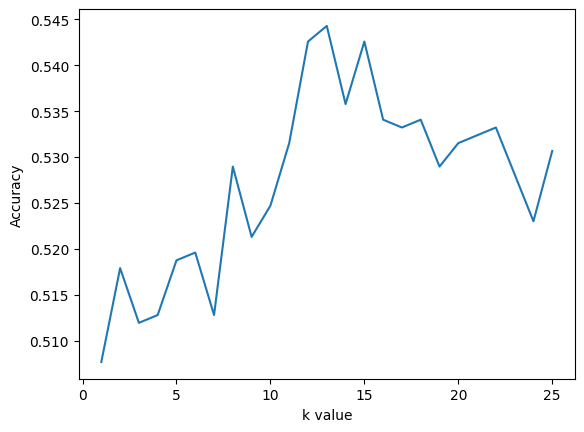

In [7]:
import matplotlib.pyplot as plt

plt.plot(k_range, scores)
plt.xlabel('k value')
plt.ylabel('Accuracy')

plt.show()

In [4]:
k_values = [i for i in range (1,31)]
scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train, y_train, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

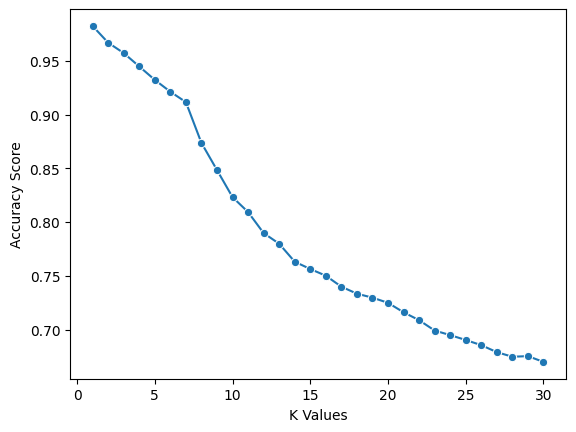

In [5]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [6]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [7]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
preds = knn.predict(X_train)
#y_ true is y_test  predict on x_text  y_pred is the output of the model
y_true = y_train
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))


              precision    recall  f1-score   support

      hiphop       1.00      1.00      1.00       477
   classical       1.00      1.00      1.00       437
         pop       1.00      1.00      1.00       423
  electronic       1.00      1.00      1.00       424
       metal       1.00      1.00      1.00       443
        rock       1.00      1.00      1.00       450
     country       1.00      1.00      1.00       419
      reggae       1.00      1.00      1.00       457

    accuracy                           1.00      3530
   macro avg       1.00      1.00      1.00      3530
weighted avg       1.00      1.00      1.00      3530



In [145]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
preds = knn.predict(X_train)
#y_ true is y_test  predict on x_text  y_pred is the output of the model
y_true = y_train
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))


              precision    recall  f1-score   support

      hiphop       0.80      0.74      0.77       477
   classical       0.86      0.91      0.89       437
         pop       0.67      0.66      0.66       423
  electronic       0.79      0.71      0.75       424
       metal       0.76      0.86      0.81       443
        rock       0.78      0.59      0.67       450
     country       0.69      0.72      0.70       419
      reggae       0.71      0.86      0.78       457

    accuracy                           0.76      3530
   macro avg       0.76      0.76      0.75      3530
weighted avg       0.76      0.76      0.75      3530



In [5]:
pca = PCA()
pca.fit(X_train)

#Transforming x_train and x_test 
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

#Find number of components that explain predefined variance threshold
sum_variance, component_count = 0, 0
while sum_variance < 0.85:
    sum_variance += pca.explained_variance_ratio_[component_count]
    component_count += 1
    
print('Number of Principal Components that explain >=85% of Variance: ', component_count)
print('Total Variance Explained by '+str(component_count)+' components:', str(sum_variance*100)+'%')

Number of Principal Components that explain >=85% of Variance:  29
Total Variance Explained by 29 components: 85.3461126300248%


In [7]:
component_count = 29
pca = PCA(n_components=component_count)
pca.fit(X_train)

#Transforming x_train and x_test 
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


#Training
model = KNeighborsClassifier(n_neighbors=13).fit(X_train_pca, y_train)


#Predict
y_pred_train = model.predict(X_train_pca)
y_pred_test = model.predict(X_test_pca)

#Performance Evaluation
train_score = accuracy_score(y_train, y_pred_train)*100
test_score = accuracy_score(y_test, y_pred_test)*100

print("Training Set Accuracy:",str(train_score)+'%')
print("Testing Set Accuracy:",str(test_score)+'%')

Training Set Accuracy: 82.23796033994334%
Testing Set Accuracy: 51.0221465076661%


In [122]:
component_count = 82
pca = PCA(n_components=component_count)
pca.fit(X_train)

#Transforming x_train and x_test 
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


#Training
model = KNeighborsClassifier(n_neighbors=13).fit(X_train_pca, y_train)


#Predict
y_pred_train = model.predict(X_train_pca)
y_pred_test = model.predict(X_test_pca)

#Performance Evaluation
train_score = accuracy_score(y_train, y_pred_train)*100
test_score = accuracy_score(y_test, y_pred_test)*100

print("Training Set Accuracy:",str(train_score)+'%')
print("Testing Set Accuracy:",str(test_score)+'%')

Training Set Accuracy: 83.8243626062323%
Testing Set Accuracy: 54.34412265758092%


In [131]:
component_count = 82
pca = PCA(n_components=component_count)
pca.fit(X_train)

#Transforming x_train and x_test 
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


#Training
model = KNeighborsClassifier(n_neighbors=15).fit(X_train_pca, y_train)


#Predict
y_pred_train = model.predict(X_train_pca)
y_pred_test = model.predict(X_test_pca)

#Performance Evaluation
train_score = accuracy_score(y_train, y_pred_train)*100
test_score = accuracy_score(y_test, y_pred_test)*100

print("Training Set Accuracy:",str(train_score)+'%')
print("Testing Set Accuracy:",str(test_score)+'%')

Training Set Accuracy: 80.45325779036827%
Testing Set Accuracy: 54.429301533219764%


In [132]:
component_count = 82
pca = PCA(n_components=component_count)
pca.fit(X_train)

#Transforming x_train and x_test 
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


#Training
model = KNeighborsClassifier(n_neighbors=19).fit(X_train_pca, y_train)


#Predict
y_pred_train = model.predict(X_train_pca)
y_pred_test = model.predict(X_test_pca)

#Performance Evaluation
train_score = accuracy_score(y_train, y_pred_train)*100
test_score = accuracy_score(y_test, y_pred_test)*100

print("Training Set Accuracy:",str(train_score)+'%')
print("Testing Set Accuracy:",str(test_score)+'%')

Training Set Accuracy: 76.31728045325778%
Testing Set Accuracy: 53.0664395229983%


In [133]:
component_count = 29
pca = PCA(n_components=component_count)
pca.fit(X_train)
#Transforming x_train and x_test 
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


#Training
model = KNeighborsClassifier(n_neighbors=19).fit(X_train_pca, y_train)


#Predict
y_pred_train = model.predict(X_train_pca)
y_pred_test = model.predict(X_test_pca)

#Performance Evaluation
train_score = accuracy_score(y_train, y_pred_train)*100
test_score = accuracy_score(y_test, y_pred_test)*100

print("Training Set Accuracy:",str(train_score)+'%')
print("Testing Set Accuracy:",str(test_score)+'%')

Training Set Accuracy: 75.94900849858357%
Testing Set Accuracy: 50.08517887563884%


In [22]:
knn=KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
preds = knn.predict(X_train)
y_true = y_train
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.86      0.87      0.87       477
   classical       0.92      0.92      0.92       437
         pop       0.77      0.78      0.78       423
  electronic       0.88      0.79      0.83       424
       metal       0.82      0.91      0.86       443
        rock       0.89      0.69      0.78       450
     country       0.79      0.83      0.81       419
      reggae       0.80      0.90      0.85       457

    accuracy                           0.84      3530
   macro avg       0.84      0.84      0.84      3530
weighted avg       0.84      0.84      0.84      3530



In [21]:
knn=KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
preds = knn.predict(X_test)
y_true = y_test
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.52      0.51      0.52       140
   classical       0.87      0.83      0.85       172
         pop       0.43      0.41      0.42       164
  electronic       0.48      0.34      0.40       148
       metal       0.61      0.75      0.67       122
        rock       0.43      0.29      0.34       154
     country       0.46      0.59      0.51       119
      reggae       0.50      0.65      0.57       155

    accuracy                           0.54      1174
   macro avg       0.54      0.55      0.53      1174
weighted avg       0.54      0.54      0.54      1174



In [26]:
weights=['uniform', 'distance']
algorithms=['auto', 'ball_tree', 'kd_tree', 'brute']
metric = ['euclidean', 'manhattan', 'minkowski']
n_neighbors = range(1, 26, 2)
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric,algorithm=algorithms)

knn=KNeighborsClassifier()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
grid_search = GridSearchCV(estimator=knn, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.974882 using {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
0.969122 (0.007189) with: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.969122 (0.007189) with: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.928706 (0.010532) with: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.948442 (0.008272) with: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.882247 (0.009221) with: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.924835 (0.008120) with: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.828045 (0.010106) with: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.904627 (0.008618) with: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.

In [58]:
knn_55=KNeighborsClassifier(weights='uniform', metric='minkowski', algorithm='brute', n_neighbors=25)
knn_55.fit(X_train, y_train)
preds = knn_55.predict(X_train)
y_true = y_train
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.79      0.72      0.75       477
   classical       0.85      0.90      0.88       437
         pop       0.63      0.60      0.62       423
  electronic       0.78      0.68      0.72       424
       metal       0.74      0.86      0.80       443
        rock       0.75      0.58      0.66       450
     country       0.67      0.67      0.67       419
      reggae       0.67      0.84      0.75       457

    accuracy                           0.73      3530
   macro avg       0.74      0.73      0.73      3530
weighted avg       0.74      0.73      0.73      3530



In [59]:
knn_55=KNeighborsClassifier(weights='uniform', metric='minkowski', algorithm='brute', n_neighbors=25)
knn_55.fit(X_train, y_train)
preds = knn_55.predict(X_test)
y_true = y_test
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.56      0.51      0.54       140
   classical       0.88      0.81      0.84       172
         pop       0.45      0.36      0.40       164
  electronic       0.45      0.30      0.36       148
       metal       0.57      0.80      0.67       122
        rock       0.37      0.25      0.29       154
     country       0.39      0.53      0.45       119
      reggae       0.50      0.70      0.58       155

    accuracy                           0.53      1174
   macro avg       0.52      0.53      0.52      1174
weighted avg       0.53      0.53      0.52      1174



In [56]:
knn_54=KNeighborsClassifier(weights='uniform', metric='minkowski', algorithm='brute', n_neighbors=23)
knn_54.fit(X_train, y_train)
preds = knn_54.predict(X_train)
y_true = y_train
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.80      0.73      0.76       477
   classical       0.86      0.91      0.88       437
         pop       0.65      0.63      0.64       423
  electronic       0.79      0.71      0.74       424
       metal       0.75      0.86      0.80       443
        rock       0.76      0.58      0.66       450
     country       0.69      0.69      0.69       419
      reggae       0.69      0.86      0.76       457

    accuracy                           0.75      3530
   macro avg       0.75      0.75      0.74      3530
weighted avg       0.75      0.75      0.74      3530



In [57]:
knn_54=KNeighborsClassifier(weights='uniform', metric='minkowski', algorithm='brute', n_neighbors=23)
knn_54.fit(X_train, y_train)
preds = knn_54.predict(X_test)
y_true = y_test
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.53      0.50      0.52       140
   classical       0.87      0.80      0.83       172
         pop       0.42      0.35      0.38       164
  electronic       0.46      0.30      0.37       148
       metal       0.59      0.81      0.68       122
        rock       0.40      0.27      0.32       154
     country       0.40      0.54      0.46       119
      reggae       0.48      0.69      0.57       155

    accuracy                           0.53      1174
   macro avg       0.52      0.53      0.52      1174
weighted avg       0.53      0.53      0.52      1174



In [55]:
knn_53=KNeighborsClassifier(weights='distance', metric='euclidean', algorithm='brute', n_neighbors=23)
knn_53.fit(X_train, y_train)
preds = knn_53.predict(X_train)
y_true = y_train
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       1.00      1.00      1.00       477
   classical       1.00      1.00      1.00       437
         pop       1.00      1.00      1.00       423
  electronic       1.00      1.00      1.00       424
       metal       1.00      1.00      1.00       443
        rock       1.00      1.00      1.00       450
     country       1.00      1.00      1.00       419
      reggae       1.00      1.00      1.00       457

    accuracy                           1.00      3530
   macro avg       1.00      1.00      1.00      3530
weighted avg       1.00      1.00      1.00      3530



In [52]:
knn_52=KNeighborsClassifier(weights='uniform', metric='minkowski', algorithm='kd_tree', n_neighbors=25)
knn_52.fit(X_train, y_train)
preds = knn_52.predict(X_train)
y_true = y_train
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.79      0.72      0.75       477
   classical       0.85      0.90      0.88       437
         pop       0.63      0.60      0.62       423
  electronic       0.78      0.68      0.72       424
       metal       0.74      0.86      0.80       443
        rock       0.75      0.58      0.66       450
     country       0.67      0.67      0.67       419
      reggae       0.67      0.84      0.75       457

    accuracy                           0.73      3530
   macro avg       0.74      0.73      0.73      3530
weighted avg       0.74      0.73      0.73      3530



In [53]:
knn_52=KNeighborsClassifier(weights='uniform', metric='minkowski', algorithm='kd_tree', n_neighbors=25)
knn_52.fit(X_train, y_train)
preds = knn_52.predict(X_test)
y_true = y_test
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.56      0.51      0.54       140
   classical       0.88      0.81      0.84       172
         pop       0.45      0.36      0.40       164
  electronic       0.45      0.30      0.36       148
       metal       0.57      0.80      0.67       122
        rock       0.37      0.25      0.29       154
     country       0.39      0.53      0.45       119
      reggae       0.50      0.70      0.58       155

    accuracy                           0.53      1174
   macro avg       0.52      0.53      0.52      1174
weighted avg       0.53      0.53      0.52      1174



In [47]:
knn_51=KNeighborsClassifier(weights='uniform', metric='euclidean', algorithm='kd_tree', n_neighbors=25)
knn_51.fit(X_train, y_train)
preds = knn_51.predict(X_train)
y_true = y_train
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.79      0.72      0.75       477
   classical       0.85      0.90      0.88       437
         pop       0.63      0.60      0.62       423
  electronic       0.78      0.68      0.72       424
       metal       0.74      0.86      0.80       443
        rock       0.75      0.58      0.66       450
     country       0.67      0.67      0.67       419
      reggae       0.67      0.84      0.75       457

    accuracy                           0.73      3530
   macro avg       0.74      0.73      0.73      3530
weighted avg       0.74      0.73      0.73      3530



In [48]:
knn_51=KNeighborsClassifier(weights='uniform', metric='euclidean', algorithm='kd_tree', n_neighbors=25)
knn_51.fit(X_train, y_train)
preds = knn_51.predict(X_test)
y_true = y_test
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.56      0.51      0.54       140
   classical       0.88      0.81      0.84       172
         pop       0.45      0.36      0.40       164
  electronic       0.45      0.30      0.36       148
       metal       0.57      0.80      0.67       122
        rock       0.37      0.25      0.29       154
     country       0.39      0.53      0.45       119
      reggae       0.50      0.70      0.58       155

    accuracy                           0.53      1174
   macro avg       0.52      0.53      0.52      1174
weighted avg       0.53      0.53      0.52      1174



In [45]:
knn_50=KNeighborsClassifier(weights='uniform', metric='minkowski', algorithm='ball_tree', n_neighbors=25)
knn_50.fit(X_train, y_train)
preds = knn_50.predict(X_train)
y_true = y_train
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.79      0.72      0.75       477
   classical       0.85      0.90      0.88       437
         pop       0.63      0.60      0.62       423
  electronic       0.78      0.68      0.72       424
       metal       0.74      0.86      0.80       443
        rock       0.75      0.58      0.66       450
     country       0.67      0.67      0.67       419
      reggae       0.67      0.84      0.75       457

    accuracy                           0.73      3530
   macro avg       0.74      0.73      0.73      3530
weighted avg       0.74      0.73      0.73      3530



In [46]:
knn_50=KNeighborsClassifier(weights='uniform', metric='minkowski', algorithm='ball_tree', n_neighbors=25)
knn_50.fit(X_train, y_train)
preds = knn_50.predict(X_test)
y_true = y_test
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.56      0.51      0.54       140
   classical       0.88      0.81      0.84       172
         pop       0.45      0.36      0.40       164
  electronic       0.45      0.30      0.36       148
       metal       0.57      0.80      0.67       122
        rock       0.37      0.25      0.29       154
     country       0.39      0.53      0.45       119
      reggae       0.50      0.70      0.58       155

    accuracy                           0.53      1174
   macro avg       0.52      0.53      0.52      1174
weighted avg       0.53      0.53      0.52      1174



In [43]:
knn_49=KNeighborsClassifier(weights='uniform', metric='euclidean', algorithm='ball_tree', n_neighbors=25)
knn_49.fit(X_train, y_train)
preds = knn_49.predict(X_train)
y_true = y_train
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.79      0.72      0.75       477
   classical       0.85      0.90      0.88       437
         pop       0.63      0.60      0.62       423
  electronic       0.78      0.68      0.72       424
       metal       0.74      0.86      0.80       443
        rock       0.75      0.58      0.66       450
     country       0.67      0.67      0.67       419
      reggae       0.67      0.84      0.75       457

    accuracy                           0.73      3530
   macro avg       0.74      0.73      0.73      3530
weighted avg       0.74      0.73      0.73      3530



In [44]:
knn_49=KNeighborsClassifier(weights='uniform', metric='euclidean', algorithm='ball_tree', n_neighbors=25)
knn_49.fit(X_train, y_train)
preds = knn_49.predict(X_test)
y_true = y_test
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.56      0.51      0.54       140
   classical       0.88      0.81      0.84       172
         pop       0.45      0.36      0.40       164
  electronic       0.45      0.30      0.36       148
       metal       0.57      0.80      0.67       122
        rock       0.37      0.25      0.29       154
     country       0.39      0.53      0.45       119
      reggae       0.50      0.70      0.58       155

    accuracy                           0.53      1174
   macro avg       0.52      0.53      0.52      1174
weighted avg       0.53      0.53      0.52      1174



In [41]:
knn_48=KNeighborsClassifier(weights='uniform', metric='minkowski', algorithm='auto', n_neighbors=25)
knn_48.fit(X_train, y_train)
preds = knn_48.predict(X_train)
y_true = y_train
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.79      0.72      0.75       477
   classical       0.85      0.90      0.88       437
         pop       0.63      0.60      0.62       423
  electronic       0.78      0.68      0.72       424
       metal       0.74      0.86      0.80       443
        rock       0.75      0.58      0.66       450
     country       0.67      0.67      0.67       419
      reggae       0.67      0.84      0.75       457

    accuracy                           0.73      3530
   macro avg       0.74      0.73      0.73      3530
weighted avg       0.74      0.73      0.73      3530



In [42]:
knn_48=KNeighborsClassifier(weights='uniform', metric='minkowski', algorithm='auto', n_neighbors=25)
knn_48.fit(X_train, y_train)
preds = knn_48.predict(X_test)
y_true = y_test
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.56      0.51      0.54       140
   classical       0.88      0.81      0.84       172
         pop       0.45      0.36      0.40       164
  electronic       0.45      0.30      0.36       148
       metal       0.57      0.80      0.67       122
        rock       0.37      0.25      0.29       154
     country       0.39      0.53      0.45       119
      reggae       0.50      0.70      0.58       155

    accuracy                           0.53      1174
   macro avg       0.52      0.53      0.52      1174
weighted avg       0.53      0.53      0.52      1174



In [39]:
knn_47=KNeighborsClassifier(weights='uniform', metric='minkowski', algorithm='auto', n_neighbors=23)
knn_47.fit(X_train, y_train)
preds = knn_47.predict(X_train)
y_true = y_train
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.80      0.73      0.76       477
   classical       0.86      0.91      0.88       437
         pop       0.65      0.63      0.64       423
  electronic       0.79      0.71      0.74       424
       metal       0.75      0.86      0.80       443
        rock       0.76      0.58      0.66       450
     country       0.69      0.69      0.69       419
      reggae       0.69      0.86      0.76       457

    accuracy                           0.75      3530
   macro avg       0.75      0.75      0.74      3530
weighted avg       0.75      0.75      0.74      3530



In [40]:
knn_47=KNeighborsClassifier(weights='uniform', metric='minkowski', algorithm='auto', n_neighbors=23)
knn_47.fit(X_train, y_train)
preds = knn_47.predict(X_test)
y_true = y_test
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.53      0.50      0.52       140
   classical       0.87      0.80      0.83       172
         pop       0.42      0.35      0.38       164
  electronic       0.46      0.30      0.37       148
       metal       0.59      0.81      0.68       122
        rock       0.40      0.27      0.32       154
     country       0.40      0.54      0.46       119
      reggae       0.48      0.69      0.57       155

    accuracy                           0.53      1174
   macro avg       0.52      0.53      0.52      1174
weighted avg       0.53      0.53      0.52      1174



In [37]:
knn_46=KNeighborsClassifier(weights='uniform', metric='manhattan', algorithm='auto', n_neighbors=25)
knn_46.fit(X_train, y_train)
preds = knn_46.predict(X_train)
y_true = y_train
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.84      0.70      0.76       477
   classical       0.87      0.91      0.89       437
         pop       0.64      0.61      0.62       423
  electronic       0.73      0.68      0.70       424
       metal       0.70      0.86      0.77       443
        rock       0.68      0.53      0.60       450
     country       0.66      0.65      0.65       419
      reggae       0.68      0.86      0.76       457

    accuracy                           0.72      3530
   macro avg       0.73      0.72      0.72      3530
weighted avg       0.73      0.72      0.72      3530



In [38]:
knn_46=KNeighborsClassifier(weights='uniform', metric='manhattan', algorithm='auto', n_neighbors=25)
knn_46.fit(X_train, y_train)
preds = knn_46.predict(X_test)
y_true = y_test
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.58      0.53      0.55       140
   classical       0.91      0.82      0.86       172
         pop       0.42      0.35      0.38       164
  electronic       0.48      0.34      0.40       148
       metal       0.59      0.78      0.67       122
        rock       0.40      0.28      0.33       154
     country       0.38      0.53      0.44       119
      reggae       0.50      0.69      0.58       155

    accuracy                           0.54      1174
   macro avg       0.53      0.54      0.53      1174
weighted avg       0.54      0.54      0.53      1174



In [35]:
knn_45=KNeighborsClassifier(weights='uniform', metric='manhattan', algorithm='auto', n_neighbors=23)
knn_45.fit(X_train, y_train)
preds = knn_45.predict(X_train)
y_true = y_train
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.86      0.73      0.79       477
   classical       0.87      0.90      0.89       437
         pop       0.64      0.61      0.62       423
  electronic       0.76      0.71      0.73       424
       metal       0.71      0.86      0.78       443
        rock       0.72      0.55      0.62       450
     country       0.67      0.68      0.67       419
      reggae       0.70      0.86      0.77       457

    accuracy                           0.74      3530
   macro avg       0.74      0.74      0.73      3530
weighted avg       0.74      0.74      0.74      3530



In [36]:
knn_45=KNeighborsClassifier(weights='uniform', metric='manhattan', algorithm='auto', n_neighbors=23)
knn_45.fit(X_train, y_train)
preds = knn_45.predict(X_test)
y_true = y_test
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.59      0.51      0.55       140
   classical       0.91      0.81      0.86       172
         pop       0.42      0.37      0.39       164
  electronic       0.50      0.36      0.42       148
       metal       0.60      0.79      0.68       122
        rock       0.40      0.27      0.32       154
     country       0.39      0.54      0.45       119
      reggae       0.50      0.70      0.58       155

    accuracy                           0.54      1174
   macro avg       0.54      0.54      0.53      1174
weighted avg       0.54      0.54      0.53      1174



In [33]:
knn_44=KNeighborsClassifier(weights='uniform', metric='euclidean', algorithm='auto', n_neighbors=25)
knn_44.fit(X_train, y_train)
preds = knn_44.predict(X_train)
y_true = y_train
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.79      0.72      0.75       477
   classical       0.85      0.90      0.88       437
         pop       0.63      0.60      0.62       423
  electronic       0.78      0.68      0.72       424
       metal       0.74      0.86      0.80       443
        rock       0.75      0.58      0.66       450
     country       0.67      0.67      0.67       419
      reggae       0.67      0.84      0.75       457

    accuracy                           0.73      3530
   macro avg       0.74      0.73      0.73      3530
weighted avg       0.74      0.73      0.73      3530



In [34]:
knn_44=KNeighborsClassifier(weights='uniform', metric='euclidean', algorithm='auto', n_neighbors=25)
knn_44.fit(X_train, y_train)
preds = knn_44.predict(X_test)
y_true = y_test
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.56      0.51      0.54       140
   classical       0.88      0.81      0.84       172
         pop       0.45      0.36      0.40       164
  electronic       0.45      0.30      0.36       148
       metal       0.57      0.80      0.67       122
        rock       0.37      0.25      0.29       154
     country       0.39      0.53      0.45       119
      reggae       0.50      0.70      0.58       155

    accuracy                           0.53      1174
   macro avg       0.52      0.53      0.52      1174
weighted avg       0.53      0.53      0.52      1174



In [31]:
knn_43=KNeighborsClassifier(weights='uniform', metric='euclidean', algorithm='auto', n_neighbors=23)
knn_43.fit(X_train, y_train)
preds = knn_43.predict(X_train)
y_true = y_train
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.80      0.73      0.76       477
   classical       0.86      0.91      0.88       437
         pop       0.65      0.63      0.64       423
  electronic       0.79      0.71      0.74       424
       metal       0.75      0.86      0.80       443
        rock       0.76      0.58      0.66       450
     country       0.69      0.69      0.69       419
      reggae       0.69      0.86      0.76       457

    accuracy                           0.75      3530
   macro avg       0.75      0.75      0.74      3530
weighted avg       0.75      0.75      0.74      3530



In [32]:
knn_43=KNeighborsClassifier(weights='uniform', metric='euclidean', algorithm='auto', n_neighbors=23)
knn_43.fit(X_train, y_train)
preds = knn_43.predict(X_test)
y_true = y_test
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.53      0.50      0.52       140
   classical       0.87      0.80      0.83       172
         pop       0.42      0.35      0.38       164
  electronic       0.46      0.30      0.37       148
       metal       0.59      0.81      0.68       122
        rock       0.40      0.27      0.32       154
     country       0.40      0.54      0.46       119
      reggae       0.48      0.69      0.57       155

    accuracy                           0.53      1174
   macro avg       0.52      0.53      0.52      1174
weighted avg       0.53      0.53      0.52      1174



In [29]:
knn_42=KNeighborsClassifier(weights='uniform', metric='minkowski', algorithm='brute', n_neighbors=25)
knn_42.fit(X_train, y_train)
preds = knn_42.predict(X_train)
y_true = y_train
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.79      0.72      0.75       477
   classical       0.85      0.90      0.88       437
         pop       0.63      0.60      0.62       423
  electronic       0.78      0.68      0.72       424
       metal       0.74      0.86      0.80       443
        rock       0.75      0.58      0.66       450
     country       0.67      0.67      0.67       419
      reggae       0.67      0.84      0.75       457

    accuracy                           0.73      3530
   macro avg       0.74      0.73      0.73      3530
weighted avg       0.74      0.73      0.73      3530



In [30]:
knn_42=KNeighborsClassifier(weights='uniform', metric='minkowski', algorithm='brute', n_neighbors=25)
knn_42.fit(X_train, y_train)
preds = knn_42.predict(X_test)
y_true = y_test
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.56      0.51      0.54       140
   classical       0.88      0.81      0.84       172
         pop       0.45      0.36      0.40       164
  electronic       0.45      0.30      0.36       148
       metal       0.57      0.80      0.67       122
        rock       0.37      0.25      0.29       154
     country       0.39      0.53      0.45       119
      reggae       0.50      0.70      0.58       155

    accuracy                           0.53      1174
   macro avg       0.52      0.53      0.52      1174
weighted avg       0.53      0.53      0.52      1174



In [27]:
knn_41=KNeighborsClassifier(weights='uniform', metric='minkowski', algorithm='brute', n_neighbors=23)
knn_41.fit(X_train, y_train)
preds = knn_41.predict(X_train)
y_true = y_train
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.80      0.73      0.76       477
   classical       0.86      0.91      0.88       437
         pop       0.65      0.63      0.64       423
  electronic       0.79      0.71      0.74       424
       metal       0.75      0.86      0.80       443
        rock       0.76      0.58      0.66       450
     country       0.69      0.69      0.69       419
      reggae       0.69      0.86      0.76       457

    accuracy                           0.75      3530
   macro avg       0.75      0.75      0.74      3530
weighted avg       0.75      0.75      0.74      3530



In [28]:
knn_41=KNeighborsClassifier(weights='uniform', metric='minkowski', algorithm='brute', n_neighbors=23)
knn_41.fit(X_train, y_train)
preds = knn_41.predict(X_test)
y_true = y_test
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.53      0.50      0.52       140
   classical       0.87      0.80      0.83       172
         pop       0.42      0.35      0.38       164
  electronic       0.46      0.30      0.37       148
       metal       0.59      0.81      0.68       122
        rock       0.40      0.27      0.32       154
     country       0.40      0.54      0.46       119
      reggae       0.48      0.69      0.57       155

    accuracy                           0.53      1174
   macro avg       0.52      0.53      0.52      1174
weighted avg       0.53      0.53      0.52      1174



In [24]:
knn_40=KNeighborsClassifier(weights='uniform', metric='minkowski', algorithm='brute', n_neighbors=25)
knn_40.fit(X_train, y_train)
preds = knn_40.predict(X_train)
y_true = y_train
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.79      0.72      0.75       477
   classical       0.85      0.90      0.88       437
         pop       0.63      0.60      0.62       423
  electronic       0.78      0.68      0.72       424
       metal       0.74      0.86      0.80       443
        rock       0.75      0.58      0.66       450
     country       0.67      0.67      0.67       419
      reggae       0.67      0.84      0.75       457

    accuracy                           0.73      3530
   macro avg       0.74      0.73      0.73      3530
weighted avg       0.74      0.73      0.73      3530



In [25]:
knn_40=KNeighborsClassifier(weights='uniform', metric='minkowski', algorithm='brute', n_neighbors=25)
knn_40.fit(X_train, y_train)
preds = knn_40.predict(X_test)
y_true = y_test
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.56      0.51      0.54       140
   classical       0.88      0.81      0.84       172
         pop       0.45      0.36      0.40       164
  electronic       0.45      0.30      0.36       148
       metal       0.57      0.80      0.67       122
        rock       0.37      0.25      0.29       154
     country       0.39      0.53      0.45       119
      reggae       0.50      0.70      0.58       155

    accuracy                           0.53      1174
   macro avg       0.52      0.53      0.52      1174
weighted avg       0.53      0.53      0.52      1174



In [22]:
knn_39=KNeighborsClassifier(weights='uniform', metric='manhattan', algorithm='brute', n_neighbors=25)
knn_39.fit(X_train, y_train)
preds = knn_39.predict(X_train)
y_true = y_train
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.84      0.70      0.76       477
   classical       0.87      0.91      0.89       437
         pop       0.64      0.61      0.62       423
  electronic       0.73      0.68      0.70       424
       metal       0.70      0.86      0.77       443
        rock       0.68      0.53      0.60       450
     country       0.66      0.65      0.65       419
      reggae       0.68      0.86      0.76       457

    accuracy                           0.72      3530
   macro avg       0.73      0.72      0.72      3530
weighted avg       0.73      0.72      0.72      3530



In [23]:
knn_39=KNeighborsClassifier(weights='uniform', metric='manhattan', algorithm='brute', n_neighbors=25)
knn_39.fit(X_train, y_train)
preds = knn_39.predict(X_test)
y_true = y_test
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.58      0.53      0.55       140
   classical       0.91      0.82      0.86       172
         pop       0.42      0.35      0.38       164
  electronic       0.48      0.34      0.40       148
       metal       0.59      0.78      0.67       122
        rock       0.40      0.28      0.33       154
     country       0.38      0.53      0.44       119
      reggae       0.50      0.69      0.58       155

    accuracy                           0.54      1174
   macro avg       0.53      0.54      0.53      1174
weighted avg       0.54      0.54      0.53      1174



In [20]:
knn_38=KNeighborsClassifier(weights='uniform', metric='euclidean', algorithm='brute', n_neighbors=25)
knn_38.fit(X_train, y_train)
preds = knn_38.predict(X_train)
y_true = y_train
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.79      0.72      0.75       477
   classical       0.85      0.90      0.88       437
         pop       0.63      0.60      0.62       423
  electronic       0.78      0.68      0.72       424
       metal       0.74      0.86      0.80       443
        rock       0.75      0.58      0.66       450
     country       0.67      0.67      0.67       419
      reggae       0.67      0.84      0.75       457

    accuracy                           0.73      3530
   macro avg       0.74      0.73      0.73      3530
weighted avg       0.74      0.73      0.73      3530



In [21]:
knn_38=KNeighborsClassifier(weights='uniform', metric='euclidean', algorithm='brute', n_neighbors=25)
knn_38.fit(X_train, y_train)
preds = knn_38.predict(X_test)
y_true = y_test
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.56      0.51      0.54       140
   classical       0.88      0.81      0.84       172
         pop       0.45      0.36      0.40       164
  electronic       0.45      0.30      0.36       148
       metal       0.57      0.80      0.67       122
        rock       0.37      0.25      0.29       154
     country       0.39      0.53      0.45       119
      reggae       0.50      0.70      0.58       155

    accuracy                           0.53      1174
   macro avg       0.52      0.53      0.52      1174
weighted avg       0.53      0.53      0.52      1174



In [18]:
knn_37=KNeighborsClassifier(weights='uniform', metric='minkowski', algorithm='kd_tree', n_neighbors=23)
knn_37.fit(X_train, y_train)
preds = knn_37.predict(X_train)
y_true = y_train
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.80      0.73      0.76       477
   classical       0.86      0.91      0.88       437
         pop       0.65      0.63      0.64       423
  electronic       0.79      0.71      0.74       424
       metal       0.75      0.86      0.80       443
        rock       0.76      0.58      0.66       450
     country       0.69      0.69      0.69       419
      reggae       0.69      0.86      0.76       457

    accuracy                           0.75      3530
   macro avg       0.75      0.75      0.74      3530
weighted avg       0.75      0.75      0.74      3530



In [19]:
knn_37=KNeighborsClassifier(weights='uniform', metric='minkowski', algorithm='kd_tree', n_neighbors=23)
knn_37.fit(X_train, y_train)
preds = knn_37.predict(X_test)
y_true = y_test
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.53      0.50      0.52       140
   classical       0.87      0.80      0.83       172
         pop       0.42      0.35      0.38       164
  electronic       0.46      0.30      0.37       148
       metal       0.59      0.81      0.68       122
        rock       0.40      0.27      0.32       154
     country       0.40      0.54      0.46       119
      reggae       0.48      0.69      0.57       155

    accuracy                           0.53      1174
   macro avg       0.52      0.53      0.52      1174
weighted avg       0.53      0.53      0.52      1174



In [14]:
knn_36=KNeighborsClassifier(weights='uniform', metric='minkowski', algorithm='ball_tree', n_neighbors=25)
knn_36.fit(X_train, y_train)
preds = knn_36.predict(X_train)
y_true = y_train
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.79      0.72      0.75       477
   classical       0.85      0.90      0.88       437
         pop       0.63      0.60      0.62       423
  electronic       0.78      0.68      0.72       424
       metal       0.74      0.86      0.80       443
        rock       0.75      0.58      0.66       450
     country       0.67      0.67      0.67       419
      reggae       0.67      0.84      0.75       457

    accuracy                           0.73      3530
   macro avg       0.74      0.73      0.73      3530
weighted avg       0.74      0.73      0.73      3530



In [15]:
knn_36=KNeighborsClassifier(weights='uniform', metric='minkowski', algorithm='ball_tree', n_neighbors=25)
knn_36.fit(X_train, y_train)
preds = knn_36.predict(X_test)
y_true = y_test
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.56      0.51      0.54       140
   classical       0.88      0.81      0.84       172
         pop       0.45      0.36      0.40       164
  electronic       0.45      0.30      0.36       148
       metal       0.57      0.80      0.67       122
        rock       0.37      0.25      0.29       154
     country       0.39      0.53      0.45       119
      reggae       0.50      0.70      0.58       155

    accuracy                           0.53      1174
   macro avg       0.52      0.53      0.52      1174
weighted avg       0.53      0.53      0.52      1174



In [12]:
knn_35=KNeighborsClassifier(weights='uniform', metric='manhattan', algorithm='ball_tree', n_neighbors=25)
knn_35.fit(X_train, y_train)
preds = knn_35.predict(X_train)
y_true = y_train
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.84      0.70      0.76       477
   classical       0.87      0.91      0.89       437
         pop       0.64      0.61      0.62       423
  electronic       0.73      0.68      0.70       424
       metal       0.70      0.86      0.77       443
        rock       0.68      0.53      0.60       450
     country       0.66      0.65      0.65       419
      reggae       0.68      0.86      0.76       457

    accuracy                           0.72      3530
   macro avg       0.73      0.72      0.72      3530
weighted avg       0.73      0.72      0.72      3530



In [13]:
knn_35=KNeighborsClassifier(weights='uniform', metric='manhattan', algorithm='ball_tree', n_neighbors=25)
knn_35.fit(X_train, y_train)
preds = knn_35.predict(X_test)
y_true = y_test
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.58      0.53      0.55       140
   classical       0.91      0.82      0.86       172
         pop       0.42      0.35      0.38       164
  electronic       0.48      0.34      0.40       148
       metal       0.59      0.78      0.67       122
        rock       0.40      0.28      0.33       154
     country       0.38      0.53      0.44       119
      reggae       0.50      0.69      0.58       155

    accuracy                           0.54      1174
   macro avg       0.53      0.54      0.53      1174
weighted avg       0.54      0.54      0.53      1174



In [9]:
knn_34=KNeighborsClassifier(weights='uniform', metric='euclidean', algorithm='auto', n_neighbors=25)
knn_34.fit(X_train, y_train)
preds = knn_34.predict(X_train)
y_true = y_train
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.79      0.72      0.75       477
   classical       0.85      0.90      0.88       437
         pop       0.63      0.60      0.62       423
  electronic       0.78      0.68      0.72       424
       metal       0.74      0.86      0.80       443
        rock       0.75      0.58      0.66       450
     country       0.67      0.67      0.67       419
      reggae       0.67      0.84      0.75       457

    accuracy                           0.73      3530
   macro avg       0.74      0.73      0.73      3530
weighted avg       0.74      0.73      0.73      3530



In [10]:
knn_34=KNeighborsClassifier(weights='uniform', metric='euclidean', algorithm='auto', n_neighbors=25)
knn_34.fit(X_train, y_train)
preds = knn_34.predict(X_test)
y_true = y_test
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.56      0.51      0.54       140
   classical       0.88      0.81      0.84       172
         pop       0.45      0.36      0.40       164
  electronic       0.45      0.30      0.36       148
       metal       0.57      0.80      0.67       122
        rock       0.37      0.25      0.29       154
     country       0.39      0.53      0.45       119
      reggae       0.50      0.70      0.58       155

    accuracy                           0.53      1174
   macro avg       0.52      0.53      0.52      1174
weighted avg       0.53      0.53      0.52      1174



In [8]:
knn_34=KNeighborsClassifier(weights='uniform', metric='minkowski', algorithm='brute', n_neighbors=25)
knn_34.fit(X_train, y_train)
preds = knn_34.predict(X_train)
y_true = y_train
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.79      0.72      0.75       477
   classical       0.85      0.90      0.88       437
         pop       0.63      0.60      0.62       423
  electronic       0.78      0.68      0.72       424
       metal       0.74      0.86      0.80       443
        rock       0.75      0.58      0.66       450
     country       0.67      0.67      0.67       419
      reggae       0.67      0.84      0.75       457

    accuracy                           0.73      3530
   macro avg       0.74      0.73      0.73      3530
weighted avg       0.74      0.73      0.73      3530



In [4]:
knn_33=KNeighborsClassifier(weights='uniform', metric='minkowski', algorithm='brute', n_neighbors=21)
knn_33.fit(X_train, y_train)
preds = knn_33.predict(X_train)
y_true = y_train
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.78      0.73      0.76       477
   classical       0.86      0.90      0.88       437
         pop       0.66      0.65      0.66       423
  electronic       0.78      0.70      0.74       424
       metal       0.77      0.86      0.81       443
        rock       0.77      0.59      0.67       450
     country       0.69      0.70      0.69       419
      reggae       0.70      0.86      0.77       457

    accuracy                           0.75      3530
   macro avg       0.75      0.75      0.75      3530
weighted avg       0.75      0.75      0.75      3530



In [5]:
knn_33=KNeighborsClassifier(weights='uniform', metric='minkowski', algorithm='brute', n_neighbors=21)
knn_33.fit(X_train, y_train)
preds = knn_33.predict(X_test)
y_true = y_test
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.50      0.46      0.48       140
   classical       0.88      0.80      0.84       172
         pop       0.42      0.37      0.40       164
  electronic       0.49      0.32      0.39       148
       metal       0.59      0.80      0.68       122
        rock       0.43      0.29      0.35       154
     country       0.43      0.55      0.49       119
      reggae       0.47      0.68      0.55       155

    accuracy                           0.53      1174
   macro avg       0.53      0.54      0.52      1174
weighted avg       0.53      0.53      0.52      1174



In [143]:
knn_32=KNeighborsClassifier(weights='uniform', metric='manhattan', algorithm='auto', n_neighbors=1)
knn_32.fit(X_train, y_train)
preds = knn_32.predict(X_train)
y_true = y_train
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       1.00      1.00      1.00       477
   classical       1.00      1.00      1.00       437
         pop       1.00      1.00      1.00       423
  electronic       1.00      1.00      1.00       424
       metal       1.00      1.00      1.00       443
        rock       1.00      1.00      1.00       450
     country       1.00      1.00      1.00       419
      reggae       1.00      1.00      1.00       457

    accuracy                           1.00      3530
   macro avg       1.00      1.00      1.00      3530
weighted avg       1.00      1.00      1.00      3530



In [141]:
knn_31=KNeighborsClassifier(weights='uniform', metric='manhattan', algorithm='brute', n_neighbors=17)
knn_31.fit(X_train, y_train)
preds = knn_31.predict(X_train)
y_true = y_train
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.87      0.79      0.83       477
   classical       0.88      0.91      0.89       437
         pop       0.69      0.68      0.68       423
  electronic       0.81      0.77      0.79       424
       metal       0.76      0.88      0.82       443
        rock       0.78      0.60      0.68       450
     country       0.70      0.70      0.70       419
      reggae       0.74      0.88      0.80       457

    accuracy                           0.78      3530
   macro avg       0.78      0.78      0.77      3530
weighted avg       0.78      0.78      0.78      3530



In [142]:
knn_31=KNeighborsClassifier(weights='uniform', metric='manhattan', algorithm='brute', n_neighbors=17)
knn_31.fit(X_train, y_train)
preds = knn_31.predict(X_test)
y_true = y_test
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.58      0.56      0.57       140
   classical       0.91      0.81      0.86       172
         pop       0.44      0.40      0.42       164
  electronic       0.48      0.36      0.41       148
       metal       0.58      0.78      0.66       122
        rock       0.38      0.26      0.31       154
     country       0.43      0.60      0.50       119
      reggae       0.54      0.66      0.60       155

    accuracy                           0.55      1174
   macro avg       0.54      0.55      0.54      1174
weighted avg       0.55      0.55      0.54      1174



In [139]:
knn_30=KNeighborsClassifier(weights='uniform', metric='euclidean', algorithm='brute', n_neighbors=17)
knn_30.fit(X_train, y_train)
preds = knn_30.predict(X_train)
y_true = y_train
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.83      0.80      0.81       477
   classical       0.87      0.91      0.89       437
         pop       0.68      0.69      0.69       423
  electronic       0.82      0.75      0.78       424
       metal       0.79      0.88      0.83       443
        rock       0.82      0.62      0.70       450
     country       0.72      0.73      0.73       419
      reggae       0.74      0.87      0.80       457

    accuracy                           0.78      3530
   macro avg       0.78      0.78      0.78      3530
weighted avg       0.78      0.78      0.78      3530



In [140]:
knn_30=KNeighborsClassifier(weights='uniform', metric='euclidean', algorithm='brute', n_neighbors=17)
knn_30.fit(X_train, y_train)
preds = knn_30.predict(X_test)
y_true = y_test
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.50      0.49      0.49       140
   classical       0.87      0.81      0.84       172
         pop       0.41      0.37      0.39       164
  electronic       0.48      0.32      0.39       148
       metal       0.60      0.79      0.68       122
        rock       0.45      0.29      0.35       154
     country       0.43      0.55      0.49       119
      reggae       0.47      0.66      0.55       155

    accuracy                           0.53      1174
   macro avg       0.53      0.54      0.52      1174
weighted avg       0.53      0.53      0.52      1174



In [137]:
knn_29=KNeighborsClassifier(weights='uniform', metric='euclidean', algorithm='kd_tree', n_neighbors=19)
knn_29.fit(X_train, y_train)
preds = knn_29.predict(X_train)
y_true = y_train
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.81      0.75      0.78       477
   classical       0.87      0.91      0.89       437
         pop       0.67      0.67      0.67       423
  electronic       0.79      0.72      0.75       424
       metal       0.77      0.86      0.81       443
        rock       0.78      0.60      0.68       450
     country       0.70      0.72      0.71       419
      reggae       0.72      0.86      0.78       457

    accuracy                           0.76      3530
   macro avg       0.76      0.76      0.76      3530
weighted avg       0.76      0.76      0.76      3530



In [138]:
knn_29=KNeighborsClassifier(weights='uniform', metric='euclidean', algorithm='kd_tree', n_neighbors=19)
knn_29.fit(X_train, y_train)
preds = knn_29.predict(X_test)
y_true = y_test
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.51      0.47      0.49       140
   classical       0.88      0.80      0.84       172
         pop       0.43      0.37      0.40       164
  electronic       0.48      0.31      0.38       148
       metal       0.59      0.80      0.68       122
        rock       0.42      0.29      0.34       154
     country       0.42      0.55      0.48       119
      reggae       0.46      0.66      0.54       155

    accuracy                           0.53      1174
   macro avg       0.52      0.53      0.52      1174
weighted avg       0.53      0.53      0.52      1174



In [135]:
knn_28=KNeighborsClassifier(weights='uniform', metric='minkowski', algorithm='ball_tree', n_neighbors=19)
knn_28.fit(X_train, y_train)
preds = knn_28.predict(X_train)
y_true = y_train
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.81      0.75      0.78       477
   classical       0.87      0.91      0.89       437
         pop       0.67      0.67      0.67       423
  electronic       0.79      0.72      0.75       424
       metal       0.77      0.86      0.81       443
        rock       0.78      0.60      0.68       450
     country       0.70      0.72      0.71       419
      reggae       0.72      0.86      0.78       457

    accuracy                           0.76      3530
   macro avg       0.76      0.76      0.76      3530
weighted avg       0.76      0.76      0.76      3530



In [136]:
knn_28=KNeighborsClassifier(weights='uniform', metric='minkowski', algorithm='ball_tree', n_neighbors=19)
knn_28.fit(X_train, y_train)
preds = knn_28.predict(X_test)
y_true = y_test
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.51      0.47      0.49       140
   classical       0.88      0.80      0.84       172
         pop       0.43      0.37      0.40       164
  electronic       0.48      0.31      0.38       148
       metal       0.59      0.80      0.68       122
        rock       0.42      0.29      0.34       154
     country       0.42      0.55      0.48       119
      reggae       0.46      0.66      0.54       155

    accuracy                           0.53      1174
   macro avg       0.52      0.53      0.52      1174
weighted avg       0.53      0.53      0.52      1174



In [128]:
knn_27=KNeighborsClassifier(weights='uniform', metric='manhattan', algorithm='kd_tree', n_neighbors=17)
knn_27.fit(X_train, y_train)
preds = knn_27.predict(X_train)
y_true = y_train
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.87      0.79      0.83       477
   classical       0.88      0.91      0.89       437
         pop       0.69      0.68      0.68       423
  electronic       0.81      0.77      0.79       424
       metal       0.76      0.88      0.82       443
        rock       0.78      0.60      0.68       450
     country       0.70      0.70      0.70       419
      reggae       0.74      0.88      0.80       457

    accuracy                           0.78      3530
   macro avg       0.78      0.78      0.77      3530
weighted avg       0.78      0.78      0.78      3530



In [129]:
knn_27=KNeighborsClassifier(weights='uniform', metric='manhattan', algorithm='kd_tree', n_neighbors=17)
knn_27.fit(X_train, y_train)
preds = knn_27.predict(X_test)
y_true = y_test
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.58      0.56      0.57       140
   classical       0.91      0.81      0.86       172
         pop       0.44      0.40      0.42       164
  electronic       0.48      0.36      0.41       148
       metal       0.58      0.78      0.66       122
        rock       0.38      0.26      0.31       154
     country       0.43      0.60      0.50       119
      reggae       0.54      0.66      0.60       155

    accuracy                           0.55      1174
   macro avg       0.54      0.55      0.54      1174
weighted avg       0.55      0.55      0.54      1174



In [125]:
knn_26=KNeighborsClassifier(weights='uniform', metric='manhattan', algorithm='auto', n_neighbors=11)
knn_26.fit(X_train, y_train)
preds = knn_26.predict(X_train)
y_true = y_train
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.91      0.90      0.90       477
   classical       0.91      0.94      0.92       437
         pop       0.81      0.86      0.83       423
  electronic       0.90      0.85      0.88       424
       metal       0.85      0.94      0.89       443
        rock       0.92      0.74      0.82       450
     country       0.86      0.83      0.85       419
      reggae       0.86      0.95      0.90       457

    accuracy                           0.88      3530
   macro avg       0.88      0.88      0.88      3530
weighted avg       0.88      0.88      0.88      3530



In [126]:
knn_26=KNeighborsClassifier(weights='uniform', metric='manhattan', algorithm='auto', n_neighbors=11)
knn_26.fit(X_train, y_train)
preds = knn_26.predict(X_test)
y_true = y_test
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.57      0.59      0.58       140
   classical       0.89      0.81      0.84       172
         pop       0.44      0.37      0.40       164
  electronic       0.47      0.36      0.41       148
       metal       0.60      0.75      0.67       122
        rock       0.39      0.30      0.34       154
     country       0.42      0.60      0.49       119
      reggae       0.57      0.66      0.61       155

    accuracy                           0.55      1174
   macro avg       0.54      0.55      0.54      1174
weighted avg       0.55      0.55      0.54      1174



In [90]:
knn_25=KNeighborsClassifier(weights='uniform', metric='minkowski', algorithm='kd_tree', n_neighbors=15)
knn_25.fit(X_train, y_train)
preds = knn_25.predict(X_train)
y_true = y_train
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.85      0.84      0.85       477
   classical       0.89      0.92      0.90       437
         pop       0.72      0.72      0.72       423
  electronic       0.84      0.77      0.80       424
       metal       0.80      0.89      0.84       443
        rock       0.84      0.64      0.73       450
     country       0.75      0.77      0.76       419
      reggae       0.77      0.89      0.83       457

    accuracy                           0.81      3530
   macro avg       0.81      0.80      0.80      3530
weighted avg       0.81      0.81      0.80      3530



In [92]:
knn_25=KNeighborsClassifier(weights='uniform', metric='minkowski', algorithm='kd_tree', n_neighbors=15)
knn_25.fit(X_train, y_train)
preds = knn_25.predict(X_test)
y_true = y_test
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.51      0.50      0.50       140
   classical       0.87      0.83      0.85       172
         pop       0.45      0.40      0.42       164
  electronic       0.47      0.34      0.39       148
       metal       0.60      0.78      0.68       122
        rock       0.45      0.30      0.36       154
     country       0.44      0.55      0.49       119
      reggae       0.49      0.66      0.56       155

    accuracy                           0.54      1174
   macro avg       0.53      0.54      0.53      1174
weighted avg       0.54      0.54      0.53      1174



In [87]:
knn_24=KNeighborsClassifier(weights='uniform', metric='minkowski', algorithm='kd_tree', n_neighbors=11)
knn_24.fit(X_train, y_train)
preds = knn_24.predict(X_train)
y_true = y_train
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.89      0.90      0.90       477
   classical       0.92      0.93      0.93       437
         pop       0.82      0.85      0.83       423
  electronic       0.91      0.82      0.86       424
       metal       0.85      0.93      0.89       443
        rock       0.91      0.74      0.82       450
     country       0.85      0.84      0.84       419
      reggae       0.84      0.95      0.89       457

    accuracy                           0.87      3530
   macro avg       0.87      0.87      0.87      3530
weighted avg       0.87      0.87      0.87      3530



In [88]:
knn_24=KNeighborsClassifier(weights='uniform', metric='minkowski', algorithm='kd_tree', n_neighbors=11)
knn_24.fit(X_train, y_train)
preds = knn_24.predict(X_test)
y_true = y_test
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.52      0.54      0.53       140
   classical       0.87      0.82      0.84       172
         pop       0.39      0.36      0.37       164
  electronic       0.48      0.34      0.40       148
       metal       0.60      0.75      0.67       122
        rock       0.39      0.27      0.32       154
     country       0.43      0.57      0.49       119
      reggae       0.51      0.63      0.56       155

    accuracy                           0.53      1174
   macro avg       0.52      0.53      0.52      1174
weighted avg       0.53      0.53      0.52      1174



In [85]:
knn_23=KNeighborsClassifier(weights='uniform', metric='minkowski', algorithm='kd_tree', n_neighbors=17)
knn_23.fit(X_train, y_train)
preds = knn_23.predict(X_train)
y_true = y_train
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.83      0.80      0.81       477
   classical       0.87      0.91      0.89       437
         pop       0.68      0.69      0.69       423
  electronic       0.82      0.75      0.78       424
       metal       0.79      0.88      0.83       443
        rock       0.82      0.62      0.70       450
     country       0.72      0.73      0.73       419
      reggae       0.74      0.87      0.80       457

    accuracy                           0.78      3530
   macro avg       0.78      0.78      0.78      3530
weighted avg       0.78      0.78      0.78      3530



In [86]:
knn_23=KNeighborsClassifier(weights='uniform', metric='minkowski', algorithm='kd_tree', n_neighbors=17)
knn_23.fit(X_train, y_train)
preds = knn_23.predict(X_test)
y_true = y_test
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.50      0.49      0.49       140
   classical       0.87      0.81      0.84       172
         pop       0.41      0.37      0.39       164
  electronic       0.48      0.32      0.39       148
       metal       0.60      0.79      0.68       122
        rock       0.45      0.29      0.35       154
     country       0.43      0.55      0.49       119
      reggae       0.47      0.66      0.55       155

    accuracy                           0.53      1174
   macro avg       0.53      0.54      0.52      1174
weighted avg       0.53      0.53      0.52      1174



In [83]:
knn_22=KNeighborsClassifier(weights='uniform', metric='minkowski', algorithm='kd_tree', n_neighbors=13)
knn_22.fit(X_train, y_train)
preds = knn_22.predict(X_train)
y_true = y_train
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.86      0.87      0.87       477
   classical       0.92      0.92      0.92       437
         pop       0.77      0.78      0.78       423
  electronic       0.88      0.79      0.83       424
       metal       0.82      0.91      0.86       443
        rock       0.89      0.69      0.78       450
     country       0.79      0.83      0.81       419
      reggae       0.80      0.90      0.85       457

    accuracy                           0.84      3530
   macro avg       0.84      0.84      0.84      3530
weighted avg       0.84      0.84      0.84      3530



In [84]:
knn_22=KNeighborsClassifier(weights='uniform', metric='minkowski', algorithm='kd_tree', n_neighbors=13)
knn_22.fit(X_train, y_train)
preds = knn_22.predict(X_test)
y_true = y_test
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.52      0.51      0.52       140
   classical       0.87      0.83      0.85       172
         pop       0.43      0.41      0.42       164
  electronic       0.48      0.34      0.40       148
       metal       0.61      0.75      0.67       122
        rock       0.43      0.29      0.34       154
     country       0.46      0.59      0.51       119
      reggae       0.50      0.65      0.57       155

    accuracy                           0.54      1174
   macro avg       0.54      0.55      0.53      1174
weighted avg       0.54      0.54      0.54      1174



In [81]:
knn_21=KNeighborsClassifier(weights='uniform', metric='manhattan', algorithm='kd_tree', n_neighbors=19)
knn_21.fit(X_train, y_train)
preds = knn_21.predict(X_train)
y_true = y_train
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.87      0.77      0.81       477
   classical       0.88      0.91      0.89       437
         pop       0.67      0.65      0.66       423
  electronic       0.78      0.74      0.76       424
       metal       0.74      0.88      0.80       443
        rock       0.75      0.56      0.64       450
     country       0.67      0.69      0.68       419
      reggae       0.73      0.88      0.79       457

    accuracy                           0.76      3530
   macro avg       0.76      0.76      0.76      3530
weighted avg       0.76      0.76      0.76      3530



In [82]:
knn_21=KNeighborsClassifier(weights='uniform', metric='manhattan', algorithm='kd_tree', n_neighbors=19)
knn_21.fit(X_train, y_train)
preds = knn_21.predict(X_test)
y_true = y_test
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.60      0.55      0.57       140
   classical       0.90      0.81      0.86       172
         pop       0.46      0.41      0.43       164
  electronic       0.49      0.35      0.41       148
       metal       0.59      0.79      0.67       122
        rock       0.40      0.27      0.32       154
     country       0.40      0.57      0.47       119
      reggae       0.53      0.69      0.60       155

    accuracy                           0.55      1174
   macro avg       0.55      0.55      0.54      1174
weighted avg       0.55      0.55      0.54      1174



In [79]:
knn_20=KNeighborsClassifier(weights='uniform', metric='manhattan', algorithm='kd_tree', n_neighbors=15)
knn_20.fit(X_train, y_train)
preds = knn_20.predict(X_train)
y_true = y_train
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.89      0.83      0.86       477
   classical       0.89      0.92      0.90       437
         pop       0.71      0.74      0.72       423
  electronic       0.85      0.79      0.82       424
       metal       0.79      0.89      0.84       443
        rock       0.83      0.62      0.71       450
     country       0.74      0.74      0.74       419
      reggae       0.77      0.91      0.83       457

    accuracy                           0.81      3530
   macro avg       0.81      0.80      0.80      3530
weighted avg       0.81      0.81      0.80      3530



In [80]:
knn_20=KNeighborsClassifier(weights='uniform', metric='manhattan', algorithm='kd_tree', n_neighbors=15)
knn_20.fit(X_train, y_train)
preds = knn_20.predict(X_test)
y_true = y_test
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.58      0.57      0.57       140
   classical       0.90      0.81      0.86       172
         pop       0.43      0.35      0.38       164
  electronic       0.49      0.35      0.41       148
       metal       0.58      0.80      0.67       122
        rock       0.38      0.27      0.32       154
     country       0.42      0.61      0.49       119
      reggae       0.54      0.66      0.60       155

    accuracy                           0.55      1174
   macro avg       0.54      0.55      0.54      1174
weighted avg       0.55      0.55      0.54      1174



In [77]:
knn_19=KNeighborsClassifier(weights='uniform', metric='manhattan', algorithm='kd_tree', n_neighbors=11)
knn_19.fit(X_train, y_train)
preds = knn_19.predict(X_train)
y_true = y_train
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.91      0.90      0.90       477
   classical       0.91      0.94      0.92       437
         pop       0.81      0.86      0.83       423
  electronic       0.90      0.85      0.88       424
       metal       0.85      0.94      0.89       443
        rock       0.92      0.74      0.82       450
     country       0.86      0.83      0.85       419
      reggae       0.86      0.95      0.90       457

    accuracy                           0.88      3530
   macro avg       0.88      0.88      0.88      3530
weighted avg       0.88      0.88      0.88      3530



In [78]:
knn_19=KNeighborsClassifier(weights='uniform', metric='manhattan', algorithm='kd_tree', n_neighbors=11)
knn_19.fit(X_train, y_train)
preds = knn_19.predict(X_test)
y_true = y_test
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.57      0.59      0.58       140
   classical       0.89      0.81      0.84       172
         pop       0.44      0.37      0.40       164
  electronic       0.47      0.36      0.41       148
       metal       0.60      0.75      0.67       122
        rock       0.39      0.30      0.34       154
     country       0.42      0.60      0.49       119
      reggae       0.57      0.66      0.61       155

    accuracy                           0.55      1174
   macro avg       0.54      0.55      0.54      1174
weighted avg       0.55      0.55      0.54      1174



In [75]:
knn_18=KNeighborsClassifier(weights='uniform', metric='euclidean', algorithm='kd_tree', n_neighbors=17)
knn_18.fit(X_train, y_train)
preds = knn_18.predict(X_train)
y_true = y_train
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.83      0.80      0.81       477
   classical       0.87      0.91      0.89       437
         pop       0.68      0.69      0.69       423
  electronic       0.82      0.75      0.78       424
       metal       0.79      0.88      0.83       443
        rock       0.82      0.62      0.70       450
     country       0.72      0.73      0.73       419
      reggae       0.74      0.87      0.80       457

    accuracy                           0.78      3530
   macro avg       0.78      0.78      0.78      3530
weighted avg       0.78      0.78      0.78      3530



In [76]:
knn_18=KNeighborsClassifier(weights='uniform', metric='euclidean', algorithm='kd_tree', n_neighbors=17)
knn_18.fit(X_train, y_train)
preds = knn_18.predict(X_test)
y_true = y_test
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.50      0.49      0.49       140
   classical       0.87      0.81      0.84       172
         pop       0.41      0.37      0.39       164
  electronic       0.48      0.32      0.39       148
       metal       0.60      0.79      0.68       122
        rock       0.45      0.29      0.35       154
     country       0.43      0.55      0.49       119
      reggae       0.47      0.66      0.55       155

    accuracy                           0.53      1174
   macro avg       0.53      0.54      0.52      1174
weighted avg       0.53      0.53      0.52      1174



In [71]:
knn_17=KNeighborsClassifier(weights='uniform', metric='euclidean', algorithm='kd_tree', n_neighbors=19)
knn_17.fit(X_train, y_train)
preds = knn_17.predict(X_train)
y_true = y_train
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.81      0.75      0.78       477
   classical       0.87      0.91      0.89       437
         pop       0.67      0.67      0.67       423
  electronic       0.79      0.72      0.75       424
       metal       0.77      0.86      0.81       443
        rock       0.78      0.60      0.68       450
     country       0.70      0.72      0.71       419
      reggae       0.72      0.86      0.78       457

    accuracy                           0.76      3530
   macro avg       0.76      0.76      0.76      3530
weighted avg       0.76      0.76      0.76      3530



In [72]:
knn_17=KNeighborsClassifier(weights='uniform', metric='euclidean', algorithm='kd_tree', n_neighbors=19)
knn_17.fit(X_train, y_train)
preds = knn_17.predict(X_test)
y_true = y_test
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.51      0.47      0.49       140
   classical       0.88      0.80      0.84       172
         pop       0.43      0.37      0.40       164
  electronic       0.48      0.31      0.38       148
       metal       0.59      0.80      0.68       122
        rock       0.42      0.29      0.34       154
     country       0.42      0.55      0.48       119
      reggae       0.46      0.66      0.54       155

    accuracy                           0.53      1174
   macro avg       0.52      0.53      0.52      1174
weighted avg       0.53      0.53      0.52      1174



In [69]:
knn_16=KNeighborsClassifier(weights='uniform', metric='minkowski', algorithm='ball_tree', n_neighbors=13)
knn_16.fit(X_train, y_train)
preds = knn_16.predict(X_train)
y_true = y_train
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.86      0.87      0.87       477
   classical       0.92      0.92      0.92       437
         pop       0.77      0.78      0.78       423
  electronic       0.88      0.79      0.83       424
       metal       0.82      0.91      0.86       443
        rock       0.89      0.69      0.78       450
     country       0.79      0.83      0.81       419
      reggae       0.80      0.90      0.85       457

    accuracy                           0.84      3530
   macro avg       0.84      0.84      0.84      3530
weighted avg       0.84      0.84      0.84      3530



In [70]:
knn_16=KNeighborsClassifier(weights='uniform', metric='minkowski', algorithm='ball_tree', n_neighbors=13)
knn_16.fit(X_train, y_train)
preds = knn_16.predict(X_test)
y_true = y_test
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.52      0.51      0.52       140
   classical       0.87      0.83      0.85       172
         pop       0.43      0.41      0.42       164
  electronic       0.48      0.34      0.40       148
       metal       0.61      0.75      0.67       122
        rock       0.43      0.29      0.34       154
     country       0.46      0.59      0.51       119
      reggae       0.50      0.65      0.57       155

    accuracy                           0.54      1174
   macro avg       0.54      0.55      0.53      1174
weighted avg       0.54      0.54      0.54      1174



In [67]:
knn_15=KNeighborsClassifier(weights='uniform', metric='euclidean', algorithm='ball_tree', n_neighbors=15)
knn_15.fit(X_train, y_train)
preds = knn_15.predict(X_train)
y_true = y_train
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.85      0.84      0.85       477
   classical       0.89      0.92      0.90       437
         pop       0.72      0.72      0.72       423
  electronic       0.84      0.77      0.80       424
       metal       0.80      0.89      0.84       443
        rock       0.84      0.64      0.73       450
     country       0.75      0.77      0.76       419
      reggae       0.77      0.89      0.83       457

    accuracy                           0.81      3530
   macro avg       0.81      0.80      0.80      3530
weighted avg       0.81      0.81      0.80      3530



In [68]:
knn_15=KNeighborsClassifier(weights='uniform', metric='euclidean', algorithm='ball_tree', n_neighbors=15)
knn_15.fit(X_train, y_train)
preds = knn_15.predict(X_test)
y_true = y_test
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.51      0.50      0.50       140
   classical       0.87      0.83      0.85       172
         pop       0.45      0.40      0.42       164
  electronic       0.47      0.34      0.39       148
       metal       0.60      0.78      0.68       122
        rock       0.45      0.30      0.36       154
     country       0.44      0.55      0.49       119
      reggae       0.49      0.66      0.56       155

    accuracy                           0.54      1174
   macro avg       0.53      0.54      0.53      1174
weighted avg       0.54      0.54      0.53      1174



In [65]:
knn_14=KNeighborsClassifier(weights='uniform', metric='euclidean', algorithm='ball_tree', n_neighbors=17)
knn_14.fit(X_train, y_train)
preds = knn_14.predict(X_train)
y_true = y_train
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.83      0.80      0.81       477
   classical       0.87      0.91      0.89       437
         pop       0.68      0.69      0.69       423
  electronic       0.82      0.75      0.78       424
       metal       0.79      0.88      0.83       443
        rock       0.82      0.62      0.70       450
     country       0.72      0.73      0.73       419
      reggae       0.74      0.87      0.80       457

    accuracy                           0.78      3530
   macro avg       0.78      0.78      0.78      3530
weighted avg       0.78      0.78      0.78      3530



In [66]:
knn_14=KNeighborsClassifier(weights='uniform', metric='euclidean', algorithm='ball_tree', n_neighbors=17)
knn_14.fit(X_train, y_train)
preds = knn_14.predict(X_test)
y_true = y_test
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.50      0.49      0.49       140
   classical       0.87      0.81      0.84       172
         pop       0.41      0.37      0.39       164
  electronic       0.48      0.32      0.39       148
       metal       0.60      0.79      0.68       122
        rock       0.45      0.29      0.35       154
     country       0.43      0.55      0.49       119
      reggae       0.47      0.66      0.55       155

    accuracy                           0.53      1174
   macro avg       0.53      0.54      0.52      1174
weighted avg       0.53      0.53      0.52      1174



# Anything over .70 will overfit

In [63]:
knn_13=KNeighborsClassifier(weights='uniform', metric='euclidean', algorithm='ball_tree', n_neighbors=9)
knn_13.fit(X_train, y_train)
preds = knn_13.predict(X_train)
y_true = y_train
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.91      0.96      0.93       477
   classical       0.96      0.95      0.95       437
         pop       0.91      0.91      0.91       423
  electronic       0.95      0.88      0.91       424
       metal       0.94      0.95      0.95       443
        rock       0.94      0.86      0.90       450
     country       0.91      0.91      0.91       419
      reggae       0.90      0.98      0.94       457

    accuracy                           0.93      3530
   macro avg       0.93      0.92      0.92      3530
weighted avg       0.93      0.93      0.93      3530



In [64]:
knn_13=KNeighborsClassifier(weights='uniform', metric='euclidean', algorithm='ball_tree', n_neighbors=9)
knn_13.fit(X_train, y_train)
preds = knn_13.predict(X_test)
y_true = y_test
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.49      0.52      0.51       140
   classical       0.86      0.79      0.82       172
         pop       0.38      0.35      0.36       164
  electronic       0.51      0.34      0.40       148
       metal       0.58      0.75      0.66       122
        rock       0.36      0.25      0.29       154
     country       0.43      0.56      0.49       119
      reggae       0.50      0.63      0.56       155

    accuracy                           0.52      1174
   macro avg       0.51      0.52      0.51      1174
weighted avg       0.52      0.52      0.51      1174



In [61]:
knn_12=KNeighborsClassifier(weights='uniform', metric='euclidean', algorithm='ball_tree', n_neighbors=11)
knn_12.fit(X_train, y_train)
preds = knn_12.predict(X_train)
y_true = y_train
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.89      0.90      0.90       477
   classical       0.92      0.93      0.93       437
         pop       0.82      0.85      0.83       423
  electronic       0.91      0.82      0.86       424
       metal       0.85      0.93      0.89       443
        rock       0.91      0.74      0.82       450
     country       0.85      0.84      0.84       419
      reggae       0.84      0.95      0.89       457

    accuracy                           0.87      3530
   macro avg       0.87      0.87      0.87      3530
weighted avg       0.87      0.87      0.87      3530



In [62]:
knn_12=KNeighborsClassifier(weights='uniform', metric='euclidean', algorithm='ball_tree', n_neighbors=11)
knn_12.fit(X_train, y_train)
preds = knn_12.predict(X_test)
y_true = y_test
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.52      0.54      0.53       140
   classical       0.87      0.82      0.84       172
         pop       0.39      0.36      0.37       164
  electronic       0.48      0.34      0.40       148
       metal       0.60      0.75      0.67       122
        rock       0.39      0.27      0.32       154
     country       0.43      0.57      0.49       119
      reggae       0.51      0.63      0.56       155

    accuracy                           0.53      1174
   macro avg       0.52      0.53      0.52      1174
weighted avg       0.53      0.53      0.52      1174



In [58]:
knn_11=KNeighborsClassifier(weights='uniform', metric='manhattan', algorithm='brute', n_neighbors=15)
knn_11.fit(X_train, y_train)
preds = knn_11.predict(X_train)
y_true = y_train
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.89      0.83      0.86       477
   classical       0.89      0.92      0.90       437
         pop       0.71      0.74      0.72       423
  electronic       0.85      0.79      0.82       424
       metal       0.79      0.89      0.84       443
        rock       0.83      0.62      0.71       450
     country       0.74      0.74      0.74       419
      reggae       0.77      0.91      0.83       457

    accuracy                           0.81      3530
   macro avg       0.81      0.80      0.80      3530
weighted avg       0.81      0.81      0.80      3530



In [59]:
knn_11=KNeighborsClassifier(weights='uniform', metric='manhattan', algorithm='brute', n_neighbors=15)
knn_11.fit(X_train, y_train)
preds = knn_11.predict(X_test)
y_true = y_test
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.58      0.57      0.57       140
   classical       0.90      0.81      0.86       172
         pop       0.43      0.35      0.38       164
  electronic       0.49      0.35      0.41       148
       metal       0.58      0.80      0.67       122
        rock       0.38      0.27      0.32       154
     country       0.42      0.61      0.49       119
      reggae       0.54      0.66      0.60       155

    accuracy                           0.55      1174
   macro avg       0.54      0.55      0.54      1174
weighted avg       0.55      0.55      0.54      1174



In [55]:
knn_10=KNeighborsClassifier(weights='uniform', metric='manhattan', algorithm='brute', n_neighbors=19)
knn_10.fit(X_train, y_train)
preds = knn_10.predict(X_train)
y_true = y_train
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.87      0.77      0.81       477
   classical       0.88      0.91      0.89       437
         pop       0.67      0.65      0.66       423
  electronic       0.78      0.74      0.76       424
       metal       0.74      0.88      0.80       443
        rock       0.75      0.56      0.64       450
     country       0.67      0.69      0.68       419
      reggae       0.73      0.88      0.79       457

    accuracy                           0.76      3530
   macro avg       0.76      0.76      0.76      3530
weighted avg       0.76      0.76      0.76      3530



In [56]:
knn_10=KNeighborsClassifier(weights='uniform', metric='manhattan', algorithm='brute', n_neighbors=19)
knn_10.fit(X_train, y_train)
preds = knn_10.predict(X_test)
y_true = y_test
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.60      0.55      0.57       140
   classical       0.90      0.81      0.86       172
         pop       0.46      0.41      0.43       164
  electronic       0.49      0.35      0.41       148
       metal       0.59      0.79      0.67       122
        rock       0.40      0.27      0.32       154
     country       0.40      0.57      0.47       119
      reggae       0.53      0.69      0.60       155

    accuracy                           0.55      1174
   macro avg       0.55      0.55      0.54      1174
weighted avg       0.55      0.55      0.54      1174



In [53]:
knn_9=KNeighborsClassifier(weights='uniform', metric='manhattan', algorithm='brute', n_neighbors=11)
knn_9.fit(X_train, y_train)
preds = knn_9.predict(X_train)
y_true = y_train
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.91      0.90      0.90       477
   classical       0.91      0.94      0.92       437
         pop       0.81      0.86      0.83       423
  electronic       0.90      0.85      0.88       424
       metal       0.85      0.94      0.89       443
        rock       0.92      0.74      0.82       450
     country       0.86      0.83      0.85       419
      reggae       0.86      0.95      0.90       457

    accuracy                           0.88      3530
   macro avg       0.88      0.88      0.88      3530
weighted avg       0.88      0.88      0.88      3530



In [54]:
knn_9=KNeighborsClassifier(weights='uniform', metric='manhattan', algorithm='brute', n_neighbors=11)
knn_9.fit(X_train, y_train)
preds = knn_9.predict(X_test)
y_true = y_test
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.57      0.59      0.58       140
   classical       0.89      0.81      0.84       172
         pop       0.44      0.37      0.40       164
  electronic       0.47      0.36      0.41       148
       metal       0.60      0.75      0.67       122
        rock       0.39      0.30      0.34       154
     country       0.42      0.60      0.49       119
      reggae       0.57      0.66      0.61       155

    accuracy                           0.55      1174
   macro avg       0.54      0.55      0.54      1174
weighted avg       0.55      0.55      0.54      1174



In [51]:
knn_8=KNeighborsClassifier(weights='uniform', metric='manhattan', algorithm='brute', n_neighbors=13)
knn_8.fit(X_train, y_train)
preds = knn_8.predict(X_train)
y_true = y_train
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.90      0.87      0.89       477
   classical       0.89      0.93      0.91       437
         pop       0.77      0.80      0.78       423
  electronic       0.89      0.83      0.86       424
       metal       0.81      0.92      0.86       443
        rock       0.88      0.67      0.76       450
     country       0.80      0.78      0.79       419
      reggae       0.81      0.92      0.86       457

    accuracy                           0.84      3530
   macro avg       0.84      0.84      0.84      3530
weighted avg       0.84      0.84      0.84      3530



In [52]:
knn_8=KNeighborsClassifier(weights='uniform', metric='manhattan', algorithm='brute', n_neighbors=13)
knn_8.fit(X_train, y_train)
preds = knn_8.predict(X_test)
y_true = y_test
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.60      0.56      0.58       140
   classical       0.90      0.83      0.86       172
         pop       0.43      0.38      0.40       164
  electronic       0.48      0.37      0.42       148
       metal       0.59      0.78      0.67       122
        rock       0.41      0.29      0.34       154
     country       0.43      0.62      0.51       119
      reggae       0.56      0.68      0.61       155

    accuracy                           0.56      1174
   macro avg       0.55      0.56      0.55      1174
weighted avg       0.56      0.56      0.55      1174



In [47]:
knn_7=KNeighborsClassifier(weights='uniform', metric='minkowski', algorithm='brute', n_neighbors=19)
knn_7.fit(X_train, y_train)
preds = knn_7.predict(X_train)
y_true = y_train
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.81      0.75      0.78       477
   classical       0.87      0.91      0.89       437
         pop       0.67      0.67      0.67       423
  electronic       0.79      0.72      0.75       424
       metal       0.77      0.86      0.81       443
        rock       0.78      0.60      0.68       450
     country       0.70      0.72      0.71       419
      reggae       0.72      0.86      0.78       457

    accuracy                           0.76      3530
   macro avg       0.76      0.76      0.76      3530
weighted avg       0.76      0.76      0.76      3530



In [48]:
knn_7=KNeighborsClassifier(weights='uniform', metric='minkowski', algorithm='brute', n_neighbors=19)
knn_7.fit(X_train, y_train)
preds = knn_7.predict(X_test)
y_true = y_test
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.51      0.47      0.49       140
   classical       0.88      0.80      0.84       172
         pop       0.43      0.37      0.40       164
  electronic       0.48      0.31      0.38       148
       metal       0.59      0.80      0.68       122
        rock       0.42      0.29      0.34       154
     country       0.42      0.55      0.48       119
      reggae       0.46      0.66      0.54       155

    accuracy                           0.53      1174
   macro avg       0.52      0.53      0.52      1174
weighted avg       0.53      0.53      0.52      1174



In [44]:
knn_6=KNeighborsClassifier(weights='uniform', metric='euclidean', algorithm='auto', n_neighbors=19)
knn_6.fit(X_train, y_train)
preds = knn_6.predict(X_train)
y_true = y_train
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.81      0.75      0.78       477
   classical       0.87      0.91      0.89       437
         pop       0.67      0.67      0.67       423
  electronic       0.79      0.72      0.75       424
       metal       0.77      0.86      0.81       443
        rock       0.78      0.60      0.68       450
     country       0.70      0.72      0.71       419
      reggae       0.72      0.86      0.78       457

    accuracy                           0.76      3530
   macro avg       0.76      0.76      0.76      3530
weighted avg       0.76      0.76      0.76      3530



In [45]:
knn_6=KNeighborsClassifier(weights='uniform', metric='euclidean', algorithm='auto', n_neighbors=19)
knn_6.fit(X_train, y_train)
preds = knn_6.predict(X_test)
y_true = y_test
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.51      0.47      0.49       140
   classical       0.88      0.80      0.84       172
         pop       0.43      0.37      0.40       164
  electronic       0.48      0.31      0.38       148
       metal       0.59      0.80      0.68       122
        rock       0.42      0.29      0.34       154
     country       0.42      0.55      0.48       119
      reggae       0.46      0.66      0.54       155

    accuracy                           0.53      1174
   macro avg       0.52      0.53      0.52      1174
weighted avg       0.53      0.53      0.52      1174



In [42]:
knn_5=KNeighborsClassifier(weights='uniform', metric='euclidean', algorithm='auto', n_neighbors=17)
knn_5.fit(X_train, y_train)
preds = knn_5.predict(X_train)
y_true = y_train
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.83      0.80      0.81       477
   classical       0.87      0.91      0.89       437
         pop       0.68      0.69      0.69       423
  electronic       0.82      0.75      0.78       424
       metal       0.79      0.88      0.83       443
        rock       0.82      0.62      0.70       450
     country       0.72      0.73      0.73       419
      reggae       0.74      0.87      0.80       457

    accuracy                           0.78      3530
   macro avg       0.78      0.78      0.78      3530
weighted avg       0.78      0.78      0.78      3530



In [43]:
knn_5=KNeighborsClassifier(weights='uniform', metric='euclidean', algorithm='auto', n_neighbors=17)
knn_5.fit(X_train, y_train)
preds = knn_5.predict(X_test)
y_true = y_test
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.50      0.49      0.49       140
   classical       0.87      0.81      0.84       172
         pop       0.41      0.37      0.39       164
  electronic       0.48      0.32      0.39       148
       metal       0.60      0.79      0.68       122
        rock       0.45      0.29      0.35       154
     country       0.43      0.55      0.49       119
      reggae       0.47      0.66      0.55       155

    accuracy                           0.53      1174
   macro avg       0.53      0.54      0.52      1174
weighted avg       0.53      0.53      0.52      1174



In [40]:
knn_4=KNeighborsClassifier(weights='uniform', metric='euclidean', algorithm='auto', n_neighbors=13)
knn_4.fit(X_train, y_train)
preds = knn_4.predict(X_train)
y_true = y_train
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.86      0.87      0.87       477
   classical       0.92      0.92      0.92       437
         pop       0.77      0.78      0.78       423
  electronic       0.88      0.79      0.83       424
       metal       0.82      0.91      0.86       443
        rock       0.89      0.69      0.78       450
     country       0.79      0.83      0.81       419
      reggae       0.80      0.90      0.85       457

    accuracy                           0.84      3530
   macro avg       0.84      0.84      0.84      3530
weighted avg       0.84      0.84      0.84      3530



In [41]:
knn_4=KNeighborsClassifier(weights='uniform', metric='euclidean', algorithm='auto', n_neighbors=13)
knn_4.fit(X_train, y_train)
preds = knn_4.predict(X_test)
y_true = y_test
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.52      0.51      0.52       140
   classical       0.87      0.83      0.85       172
         pop       0.43      0.41      0.42       164
  electronic       0.48      0.34      0.40       148
       metal       0.61      0.75      0.67       122
        rock       0.43      0.29      0.34       154
     country       0.46      0.59      0.51       119
      reggae       0.50      0.65      0.57       155

    accuracy                           0.54      1174
   macro avg       0.54      0.55      0.53      1174
weighted avg       0.54      0.54      0.54      1174



In [38]:
knn_3=KNeighborsClassifier(weights='uniform', metric='euclidean', algorithm='auto', n_neighbors=11)
knn_3.fit(X_train, y_train)
preds = knn_3.predict(X_train)
y_true = y_train
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.89      0.90      0.90       477
   classical       0.92      0.93      0.93       437
         pop       0.82      0.85      0.83       423
  electronic       0.91      0.82      0.86       424
       metal       0.85      0.93      0.89       443
        rock       0.91      0.74      0.82       450
     country       0.85      0.84      0.84       419
      reggae       0.84      0.95      0.89       457

    accuracy                           0.87      3530
   macro avg       0.87      0.87      0.87      3530
weighted avg       0.87      0.87      0.87      3530



In [39]:
knn_3=KNeighborsClassifier(weights='uniform', metric='euclidean', algorithm='auto', n_neighbors=11)
knn_3.fit(X_train, y_train)
preds = knn_3.predict(X_test)
y_true = y_test
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.52      0.54      0.53       140
   classical       0.87      0.82      0.84       172
         pop       0.39      0.36      0.37       164
  electronic       0.48      0.34      0.40       148
       metal       0.60      0.75      0.67       122
        rock       0.39      0.27      0.32       154
     country       0.43      0.57      0.49       119
      reggae       0.51      0.63      0.56       155

    accuracy                           0.53      1174
   macro avg       0.52      0.53      0.52      1174
weighted avg       0.53      0.53      0.52      1174



In [36]:
knn_2=KNeighborsClassifier(weights='uniform', metric='euclidean', algorithm='auto', n_neighbors=15)
knn_2.fit(X_train, y_train)
preds = knn_2.predict(X_train)
y_true = y_train
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.85      0.84      0.85       477
   classical       0.89      0.92      0.90       437
         pop       0.72      0.72      0.72       423
  electronic       0.84      0.77      0.80       424
       metal       0.80      0.89      0.84       443
        rock       0.84      0.64      0.73       450
     country       0.75      0.77      0.76       419
      reggae       0.77      0.89      0.83       457

    accuracy                           0.81      3530
   macro avg       0.81      0.80      0.80      3530
weighted avg       0.81      0.81      0.80      3530



In [37]:
knn_2=KNeighborsClassifier(weights='uniform', metric='euclidean', algorithm='auto', n_neighbors=15)
knn_2.fit(X_train, y_train)
preds = knn_2.predict(X_test)
y_true = y_test
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.51      0.50      0.50       140
   classical       0.87      0.83      0.85       172
         pop       0.45      0.40      0.42       164
  electronic       0.47      0.34      0.39       148
       metal       0.60      0.78      0.68       122
        rock       0.45      0.30      0.36       154
     country       0.44      0.55      0.49       119
      reggae       0.49      0.66      0.56       155

    accuracy                           0.54      1174
   macro avg       0.53      0.54      0.53      1174
weighted avg       0.54      0.54      0.53      1174



In [34]:
knn_1=KNeighborsClassifier(weights='uniform', metric='euclidean', algorithm='auto', n_neighbors=13)
knn_1.fit(X_train, y_train)
preds = knn_1.predict(X_train)
y_true = y_train
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.86      0.87      0.87       477
   classical       0.92      0.92      0.92       437
         pop       0.77      0.78      0.78       423
  electronic       0.88      0.79      0.83       424
       metal       0.82      0.91      0.86       443
        rock       0.89      0.69      0.78       450
     country       0.79      0.83      0.81       419
      reggae       0.80      0.90      0.85       457

    accuracy                           0.84      3530
   macro avg       0.84      0.84      0.84      3530
weighted avg       0.84      0.84      0.84      3530



In [35]:
knn_1=KNeighborsClassifier(weights='uniform', metric='euclidean', algorithm='auto', n_neighbors=13)
knn_1.fit(X_train, y_train)
preds = knn_1.predict(X_test)
y_true = y_test
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.52      0.51      0.52       140
   classical       0.87      0.83      0.85       172
         pop       0.43      0.41      0.42       164
  electronic       0.48      0.34      0.40       148
       metal       0.61      0.75      0.67       122
        rock       0.43      0.29      0.34       154
     country       0.46      0.59      0.51       119
      reggae       0.50      0.65      0.57       155

    accuracy                           0.54      1174
   macro avg       0.54      0.55      0.53      1174
weighted avg       0.54      0.54      0.54      1174



In [93]:
component_count = 29
pca = PCA(n_components=component_count)
pca.fit(X_train)

#Transforming x_train and x_test 
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


#Training
model = KNeighborsClassifier(weights='uniform', metric='manhattan', algorithm='kd_tree', n_neighbors=19).fit(X_train_pca, y_train)


#Predict
y_pred_train = model.predict(X_train_pca)
y_pred_test = model.predict(X_test_pca)

#Performance Evaluation
train_score = accuracy_score(y_train, y_pred_train)*100
test_score = accuracy_score(y_test, y_pred_test)*100

print("Training Set Accuracy:",str(train_score)+'%')
print("Testing Set Accuracy:",str(test_score)+'%')

Training Set Accuracy: 77.96033994334277%
Testing Set Accuracy: 51.618398637137986%


In [111]:
component_count = 80
pca = PCA(n_components=component_count)
pca.fit(X_train)

#Transforming x_train and x_test 
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


#Training
model = KNeighborsClassifier(weights='uniform', metric='manhattan', algorithm='kd_tree', n_neighbors=19).fit(X_train_pca, y_train)


#Predict
y_pred_train = model.predict(X_train_pca)
y_pred_test = model.predict(X_test_pca)

#Performance Evaluation
train_score = accuracy_score(y_train, y_pred_train)*100
test_score = accuracy_score(y_test, y_pred_test)*100

print("Training Set Accuracy:",str(train_score)+'%')
print("Testing Set Accuracy:",str(test_score)+'%')

Training Set Accuracy: 79.51841359773371%
Testing Set Accuracy: 51.78875638841567%


In [94]:
component_count = 29
pca = PCA(n_components=component_count)
pca.fit(X_train)

#Transforming x_train and x_test 
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


#Training
model = KNeighborsClassifier(weights='uniform', metric='manhattan', algorithm='brute', n_neighbors=13).fit(X_train_pca, y_train)


#Predict
y_pred_train = model.predict(X_train_pca)
y_pred_test = model.predict(X_test_pca)

#Performance Evaluation
train_score = accuracy_score(y_train, y_pred_train)*100
test_score = accuracy_score(y_test, y_pred_test)*100

print("Training Set Accuracy:",str(train_score)+'%')
print("Testing Set Accuracy:",str(test_score)+'%')




Training Set Accuracy: 84.58923512747876%
Testing Set Accuracy: 52.12947189097103%


In [121]:
component_count = 82
pca = PCA(n_components=component_count)
pca.fit(X_train)

#Transforming x_train and x_test 
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


#Training
model = KNeighborsClassifier(weights='uniform', metric='manhattan', algorithm='brute', n_neighbors=13).fit(X_train_pca, y_train)


#Predict
y_pred_train = model.predict(X_train_pca)
y_pred_test = model.predict(X_test_pca)

#Performance Evaluation
train_score = accuracy_score(y_train, y_pred_train)*100
test_score = accuracy_score(y_test, y_pred_test)*100

print("Training Set Accuracy:",str(train_score)+'%')
print("Testing Set Accuracy:",str(test_score)+'%')


Training Set Accuracy: 85.77903682719547%
Testing Set Accuracy: 51.0221465076661%


In [96]:
component_count = 29
pca = PCA(n_components=component_count)
pca.fit(X_train)

#Transforming x_train and x_test 
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


#Training
model = KNeighborsClassifier(weights='uniform', metric='minkowski', algorithm='kd_tree', n_neighbors=17).fit(X_train_pca, y_train)


#Predict
y_pred_train = model.predict(X_train_pca)
y_pred_test = model.predict(X_test_pca)

#Performance Evaluation
train_score = accuracy_score(y_train, y_pred_train)*100
test_score = accuracy_score(y_test, y_pred_test)*100

print("Training Set Accuracy:",str(train_score)+'%')
print("Testing Set Accuracy:",str(test_score)+'%')



Training Set Accuracy: 78.10198300283287%
Testing Set Accuracy: 49.31856899488927%


In [107]:
component_count = 60
pca = PCA(n_components=component_count)
pca.fit(X_train)

#Transforming x_train and x_test 
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


#Training
model = KNeighborsClassifier(weights='uniform', metric='minkowski', algorithm='kd_tree', n_neighbors=17).fit(X_train_pca, y_train)


#Predict
y_pred_train = model.predict(X_train_pca)
y_pred_test = model.predict(X_test_pca)

#Performance Evaluation
train_score = accuracy_score(y_train, y_pred_train)*100
test_score = accuracy_score(y_test, y_pred_test)*100

print("Training Set Accuracy:",str(train_score)+'%')
print("Testing Set Accuracy:",str(test_score)+'%')

Training Set Accuracy: 77.76203966005666%
Testing Set Accuracy: 52.81090289608177%


In [110]:
component_count = 80
pca = PCA(n_components=component_count)
pca.fit(X_train)

#Transforming x_train and x_test 
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


#Training
model = KNeighborsClassifier(weights='uniform', metric='minkowski', algorithm='kd_tree', n_neighbors=17).fit(X_train_pca, y_train)


#Predict
y_pred_train = model.predict(X_train_pca)
y_pred_test = model.predict(X_test_pca)

#Performance Evaluation
train_score = accuracy_score(y_train, y_pred_train)*100
test_score = accuracy_score(y_test, y_pred_test)*100

print("Training Set Accuracy:",str(train_score)+'%')
print("Testing Set Accuracy:",str(test_score)+'%')

Training Set Accuracy: 77.98866855524079%
Testing Set Accuracy: 54.0885860306644%


In [113]:
component_count = 75
pca = PCA(n_components=component_count)
pca.fit(X_train)

#Transforming x_train and x_test 
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


#Training
model = KNeighborsClassifier(weights='uniform', metric='minkowski', algorithm='kd_tree', n_neighbors=17).fit(X_train_pca, y_train)


#Predict
y_pred_train = model.predict(X_train_pca)
y_pred_test = model.predict(X_test_pca)

#Performance Evaluation
train_score = accuracy_score(y_train, y_pred_train)*100
test_score = accuracy_score(y_test, y_pred_test)*100

print("Training Set Accuracy:",str(train_score)+'%')
print("Testing Set Accuracy:",str(test_score)+'%')

Training Set Accuracy: 78.07365439093485%
Testing Set Accuracy: 53.74787052810903%


# Best model?

In [115]:
component_count = 82
pca = PCA(n_components=component_count)
pca.fit(X_train)

#Transforming x_train and x_test 
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


#Training
model = KNeighborsClassifier(weights='uniform', metric='minkowski', algorithm='kd_tree', n_neighbors=17).fit(X_train_pca, y_train)


#Predict
y_pred_train = model.predict(X_train_pca)
y_pred_test = model.predict(X_test_pca)

#Performance Evaluation
train_score = accuracy_score(y_train, y_pred_train)*100
test_score = accuracy_score(y_test, y_pred_test)*100

print("Training Set Accuracy:",str(train_score)+'%')
print("Testing Set Accuracy:",str(test_score)+'%')

Training Set Accuracy: 78.04532577903683%
Testing Set Accuracy: 54.173764906303234%


In [130]:

component_count = 82
pca = PCA(n_components=component_count)
pca.fit(X_train)

#Transforming x_train and x_test 
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


#Training
model = KNeighborsClassifier(weights='uniform', metric='manhattan', algorithm='kd_tree', n_neighbors=17).fit(X_train_pca, y_train)


#Predict
y_pred_train = model.predict(X_train_pca)
y_pred_test = model.predict(X_test_pca)

#Performance Evaluation
train_score = accuracy_score(y_train, y_pred_train)*100
test_score = accuracy_score(y_test, y_pred_test)*100

print("Training Set Accuracy:",str(train_score)+'%')
print("Testing Set Accuracy:",str(test_score)+'%')

Training Set Accuracy: 80.59490084985835%
Testing Set Accuracy: 51.36286201022146%


In [62]:

component_count = 20
pca = PCA(n_components=component_count)
pca.fit(X_train)

#Transforming x_train and x_test 
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


#Training
model = KNeighborsClassifier(weights='uniform', metric='euclidean', algorithm='kd_tree', n_neighbors=17).fit(X_train_pca, y_train)


#Predict
y_pred_train = model.predict(X_train_pca)
y_pred_test = model.predict(X_test_pca)

#Performance Evaluation
train_score = accuracy_score(y_train, y_pred_train)*100
test_score = accuracy_score(y_test, y_pred_test)*100

print("Training Set Accuracy:",str(train_score)+'%')
print("Testing Set Accuracy:",str(test_score)+'%')

Training Set Accuracy: 76.37393767705383%
Testing Set Accuracy: 49.65928449744463%


In [63]:

 
component_count = 29
pca = PCA(n_components=component_count)
pca.fit(X_train)

#Transforming x_train and x_test 
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


#Training
model = KNeighborsClassifier(weights='uniform', metric='minkowski', algorithm='brute', n_neighbors=25).fit(X_train_pca, y_train)


#Predict
y_pred_train = model.predict(X_train_pca)
y_pred_test = model.predict(X_test_pca)

#Performance Evaluation
train_score = accuracy_score(y_train, y_pred_train)*100
test_score = accuracy_score(y_test, y_pred_test)*100

print("Training Set Accuracy:",str(train_score)+'%')
print("Testing Set Accuracy:",str(test_score)+'%')

Training Set Accuracy: 72.23796033994334%
Testing Set Accuracy: 51.0221465076661%


In [108]:
pca = PCA()
# set the tolerance to a large value to make the example faster
knn = KNeighborsClassifier()
pipe = Pipeline(steps=[("pca", pca), ("knn", knn)])
param_grid = {
    "pca__n_components": [5, 15, 30, 45, 60, 70, 80],
    
}
search = GridSearchCV(pipe, param_grid, n_jobs=2)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.932):
{'pca__n_components': 80}


In [112]:
pca = PCA()
# set the tolerance to a large value to make the example faster
knn = KNeighborsClassifier()
pipe = Pipeline(steps=[("pca", pca), ("knn", knn)])
param_grid = {
    "pca__n_components": [ 45,59, 60,65, 70,75, 80, 85, 90],
    
}
search = GridSearchCV(pipe, param_grid, n_jobs=2)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.933):
{'pca__n_components': 75}


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/pipeline.py", line

In [116]:
pca = PCA()
# set the tolerance to a large value to make the example faster
knn = KNeighborsClassifier()
pipe = Pipeline(steps=[("pca", pca), ("knn", knn)])
param_grid = {
    "pca__n_components": [ 60,65,70, 73, 71, 72, 74,75, 80, 81,82, 83, 84,85,86, 87, 89, 90],
    
}
search = GridSearchCV(pipe, param_grid, n_jobs=2)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.933):
{'pca__n_components': 82}


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/pipeline.py", line

/tmp/ipykernel_4085/2540311063.py:19: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  best_clfs = results.groupby(components_col).apply(


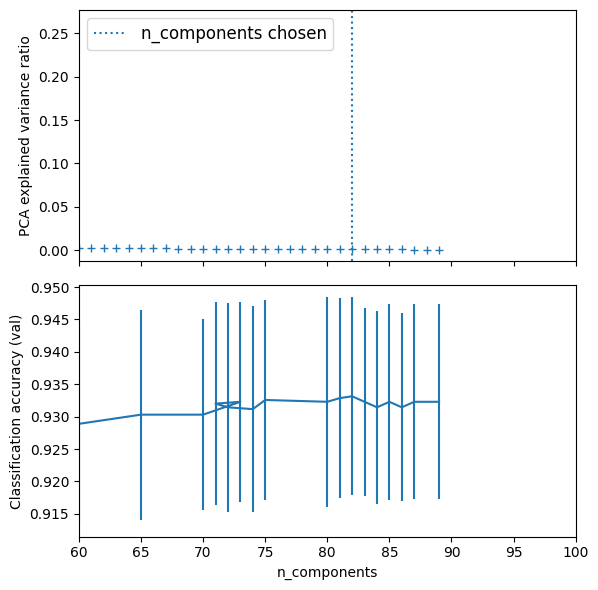

In [120]:
pca.fit(X_train)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(
    np.arange(1, pca.n_components_ + 1), pca.explained_variance_ratio_, "+", linewidth=2
)
ax0.set_ylabel("PCA explained variance ratio")

ax0.axvline(
    search.best_estimator_.named_steps["pca"].n_components,
    linestyle=":",
    label="n_components chosen",
)
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
components_col = "param_pca__n_components"
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, "mean_test_score")
)

best_clfs.plot(
    x=components_col, y="mean_test_score", yerr="std_test_score", legend=False, ax=ax1
)
ax1.set_ylabel("Classification accuracy (val)")
ax1.set_xlabel("n_components")

plt.xlim(60, 100)

plt.tight_layout()
plt.show()

In [106]:
pca = PCA()
pca.fit(X_train)

#Transforming x_train and x_test 
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

#Find number of components that explain predefined variance threshold
sum_variance, component_count = 0, 0
while sum_variance < 0.85:
    sum_variance += pca.explained_variance_ratio_[component_count]
    component_count += 1
    
print('Number of Principal Components that explain >=85% of Variance: ', component_count)
print('Total Variance Explained by '+str(component_count)+' components:', str(sum_variance*100)+'%')

Number of Principal Components that explain >=85% of Variance:  29
Total Variance Explained by 29 components: 85.3461126300248%


In [12]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train,y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 1
